In [1]:
import pandas as pd


In [2]:
my_data = pd.read_csv('clean_data.csv')

In [3]:
#my_data.head(30)

In [4]:
downloaded_data = pd.read_csv('downloaded_car_dataset.csv')

In [5]:
downloaded_data = downloaded_data.drop(columns=['car_ID'])

In [6]:
#downloaded_data.head(15)

In [7]:
#my_data.dtypes

In [8]:
#without bucking the worst prediction was around 200B off, with bucketing the worst prediction was 219K off

#bucketing some ext colors to reduce dimensions for regression
ext_colors = my_data['ext_color'].value_counts()
uncommon_colors = list(ext_colors[ext_colors <= 20].index)
len(uncommon_colors)
my_data['ext_color'] = my_data['ext_color'].replace(uncommon_colors, 'rare color')

In [9]:
#bucketing some int colors to reduce dimensions for regression
int_colors = my_data['int_color'].value_counts()
uncommon_int_colors = list(int_colors[int_colors <= 20].index)
len(uncommon_int_colors)
my_data['int_color'] = my_data['int_color'].replace(uncommon_int_colors, 'rare interior')

In [10]:
#my_data['int_color'].value_counts()

In [11]:
#analysis using my data
my_data = pd.get_dummies(my_data, drop_first=True)

In [12]:
#my_data.shape

In [13]:
#my_data.head(30)

In [14]:
#for regression the Y will be the price
y = my_data['price']

#X will be all the columns that contribute to the price
X = my_data.drop(columns = ['price'], axis=1)

In [15]:
#X.head(15)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, max_error

In [17]:
#splitting to train and test using train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [19]:
#fit the model using the train data
reg = LinearRegression().fit(X_train, y_train)

#predicted values
pred = reg.predict(X_test)

In [20]:
#checking some error stats
mae = mean_absolute_error(y_test, pred)
print('The mean absolute error is: ', mae)

The mean absolute error is:  18046.024982383104


In [21]:
#checking some error stats
top_error = max_error(y_test, pred)
print('The maximum error is: ', top_error)

The maximum error is:  218791.28935544193


C:\Users\erikc\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

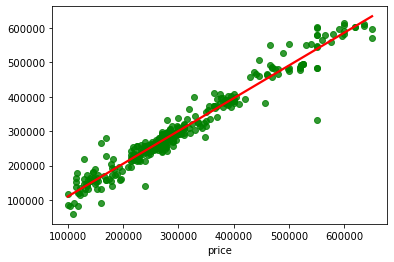

In [22]:
#my data summary/visualisations with christmas colors
import seaborn as sns

sns.regplot(y_test, pred, ci=None, scatter_kws={"color": "green"}, line_kws = {'color': 'red'})

In [23]:
#checking some values of the coefficients and also the intercept
print(reg.coef_)
print(reg.intercept_)
print(X_test.columns.values)

[-2.23162526e+00 -9.47833454e+03  1.20720163e+04 -5.18957225e+04
 -1.78982979e+05 -1.60657825e+05 -1.01763776e+05  2.01405522e+05
 -8.63307578e+04 -5.96901352e+04  1.82300855e+05  2.36134411e+05
 -3.04550010e+04 -6.98590131e+04  2.08408250e+04 -8.36766349e+04
  2.34296869e+05  6.23963213e+04 -2.05269215e+05 -1.34206951e+05
 -5.23625484e+02 -1.28218164e+05 -2.69042644e+04 -1.40521333e+05
  6.69100939e+04 -6.09101401e+03 -4.30254184e+04 -6.05018916e+04
 -1.27844353e+05 -1.12511260e+05 -1.90716194e+04 -6.31496075e+04
  2.20602400e+03  8.08656212e+03  5.66097599e+03  9.50791326e+03
  9.47483107e+03  7.53261186e+03  7.69705150e+03  4.40814422e+03
  1.42232785e+03  9.40924240e+03  9.81594524e+03  1.24034932e+04
  6.41218743e+03  4.94150637e+03  7.27714419e+03  1.07009651e+04
  1.01512735e+03  1.19477671e+04  1.15402803e+04  8.09869491e+03
  1.11556656e+04  1.33316086e+04  4.65519339e+03  1.26395867e+03
 -1.02341538e+04 -3.27504200e+03 -6.45119317e+02  8.40298163e+02
 -4.22082845e+03  6.77760

In [24]:
#making a DF using the coefficients from the regression, the intercept for comparison, and the coefficients names so I can plot them more cleanly in future plots.
model1_sum = pd.DataFrame()
model1_sum['coefficient_change'] = reg.coef_
model1_sum['intercept'] = reg.intercept_
model1_sum['coefficient_name'] = X_test.columns.values
model1_sum['intercept'] = model1_sum['intercept'].apply('{:,.2f}'.format)
model1_sum['coefficient_change'] = model1_sum['coefficient_change'].apply('{:.2f}'.format)
model1_sum['coefficient_change'] = model1_sum['coefficient_change'].apply(pd.to_numeric)
model1_sum

,coefficient_change,intercept,coefficient_name
0,-2.23,"-23,587,702.09",mileage
1,-9478.33,"-23,587,702.09",mpg
2,12072.02,"-23,587,702.09",year
3,-51895.72,"-23,587,702.09",engine_size
4,-178982.98,"-23,587,702.09",name_ 360 Modena
...,...,...,...
71,24436.27,"-23,587,702.09",transmission_Manual Transmission
72,43025.42,"-23,587,702.09",rwd_yes
73,-661.32,"-23,587,702.09",condition_Used
74,7727.15,"-23,587,702.09",engine_info_8-Cylinder Gas Engine


In [25]:
#sorting the df by descending coefficient change, so the most impactful variables will be at the top and the least impactful will be at the bottom
pd.set_option('display.max_rows', 10)
model1_sum_sorted = model1_sum.sort_values(by=['coefficient_change'], ascending=False)
model1_sum_sorted

,coefficient_change,intercept,coefficient_name
11,236134.41,"-23,587,702.09",name_ 488 Pista Spider
16,234296.87,"-23,587,702.09",name_ 812 GTS
7,201405.52,"-23,587,702.09",name_ 458 Speciale Coupe
10,182300.86,"-23,587,702.09",name_ 488 Pista Coupe
24,66910.09,"-23,587,702.09",name_ F8 Spider
...,...,...,...
19,-134206.95,"-23,587,702.09",name_ California T
23,-140521.33,"-23,587,702.09",name_ F430 Spider
5,-160657.83,"-23,587,702.09",name_ 360 Spider
4,-178982.98,"-23,587,702.09",name_ 360 Modena


<AxesSubplot:xlabel='coefficient_name'>

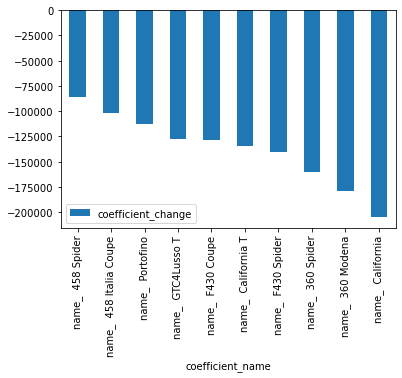

In [26]:
#top ten features that decrease value in a ferrari
model1_sum_sorted.tail(10).plot.bar(x='coefficient_name', y='coefficient_change')

<AxesSubplot:xlabel='coefficient_name'>

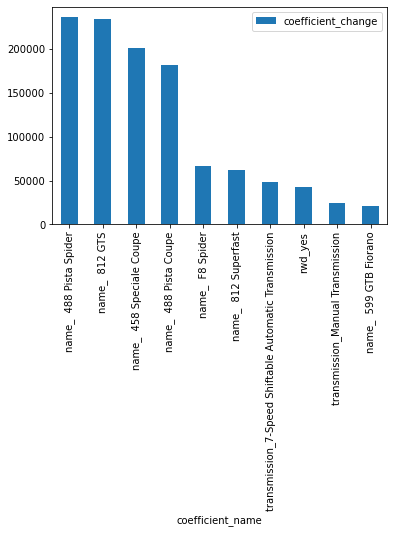

In [27]:
#the top 10 features that add value in a ferrari
model1_sum_sorted.head(10).plot.bar(x='coefficient_name', y='coefficient_change')

In [28]:
#installing shap and then importing the library

#!pip install shap
import shap

In [29]:
#plotting SHAP values to help explain the contributing variables importances in the regression model
explainer = shap.Explainer(reg, X_train, feature_names=X_test.columns.values)
shap_values = explainer(X_test)

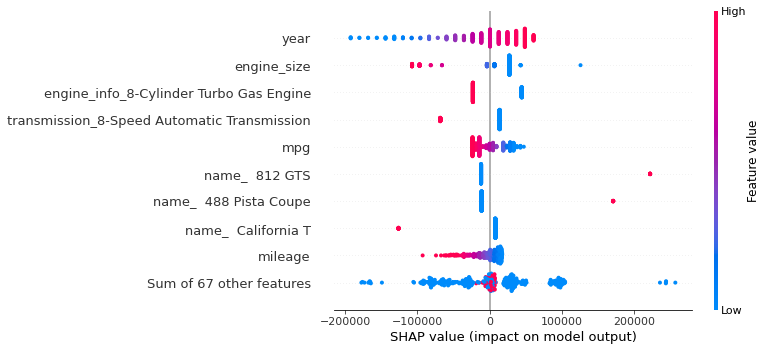

In [30]:
shap.plots.beeswarm(shap_values)

In [31]:
######################################################################################################################################################
#comparing to a downloaded dataset to compare different datasets
######################################################################################################################################################

In [32]:
#using downloaded data
downloaded_data = pd.get_dummies(downloaded_data, drop_first=True)

y2 = downloaded_data['price']
X2 = downloaded_data.drop(columns = ['price'])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .2, random_state = 42)

In [33]:
#fit the model using the train data
reg2 = LinearRegression().fit(X2_train, y2_train)

#predicted values
pred2 = reg2.predict(X2_test)

In [34]:
#checking some error stats
mae2 = mean_absolute_error(y2_test, pred2)
print('The mean absolute error is: ', mae2)

The mean absolute error is:  4177.2956313499635


In [35]:
#checking some error stats
top_error2 = max_error(y2_test, pred2)
print('The maximum error is: ', top_error2)

The maximum error is:  26242.06200092181


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='price'>

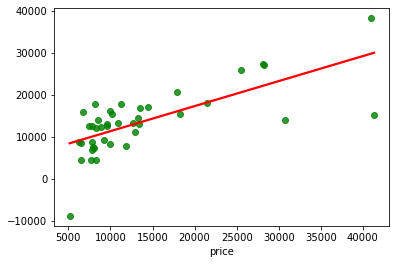

In [36]:
#my data summary/visualisations with christmas colors
#plotting the regression line
import seaborn as sns

sns.regplot(y2_test, pred2, ci=None, scatter_kws={"color": "green"}, line_kws = {'color': 'red'})

In [37]:
#checking some values of the coefficients and also the intercept
print(reg2.coef_)
print(reg2.intercept_)
print(X2_test.columns.values)

[ 1.11391756e+03  3.94617695e+02 -3.35004775e+02  8.81249664e+02
 -5.79276391e+02  1.87269560e+01  1.52313676e+01 -5.75538464e+03
 -2.97300017e+02 -1.44924164e+03 -3.88410209e+01  1.95155448e+00
 -6.79783059e+01  1.33830069e+02  2.60181624e+03 -5.64040808e+03
 -2.63540808e+03 -8.63470916e+02 -2.71648909e+03 -2.53085352e+02
 -1.73287461e+03  2.27373675e-12  2.10727178e+03  3.74666189e+03
  1.64390223e+04  1.42141855e+04  2.74667400e-10 -9.09494702e-13
  1.28571606e+04  3.86535248e-11 -1.25965016e-10  3.38786776e-10
 -6.44604370e-11 -2.04524633e+03  9.16573076e+03  1.16326147e+03
 -2.98718442e+03  1.30285116e-10 -2.49381660e+03 -4.73584449e+03
 -3.21498196e+03 -8.16699911e+03  2.53749022e-10 -8.89246695e+03
 -4.03905886e+03 -6.32125404e+03 -3.44771687e+03 -7.25844668e+03
 -3.99910992e+03 -1.08345860e+03 -4.39750724e+03 -3.29573286e+03
 -2.36988073e+03 -5.73497148e+03 -1.57121280e+03 -1.30228210e+03
 -3.72287816e+03 -2.94417414e+03 -1.74887600e+03 -7.82165444e-11
 -3.13820285e+03 -2.66694

In [38]:
#making a DF using the coefficients from the regression, the intercept for comparison, and the coefficients names so I can plot them more cleanly in future plots.
model2_sum = pd.DataFrame()
model2_sum['coefficient_change'] = reg2.coef_
model2_sum['intercept'] = reg2.intercept_
model2_sum['coefficient_name'] = X2_test.columns.values
model2_sum['intercept'] = model2_sum['intercept'].apply('{:,.2f}'.format)
model2_sum['coefficient_change'] = model2_sum['coefficient_change'].apply('{:.2f}'.format)
model2_sum['coefficient_change'] = model2_sum['coefficient_change'].apply(pd.to_numeric)
model2_sum

,coefficient_change,intercept,coefficient_name
0,1113.92,"-7,925.56",symboling
1,394.62,"-7,925.56",wheelbase
2,-335.00,"-7,925.56",carlength
3,881.25,"-7,925.56",carwidth
4,-579.28,"-7,925.56",carheight
...,...,...,...
184,9850.87,"-7,925.56",fuelsystem_idi
185,-4039.06,"-7,925.56",fuelsystem_mfi
186,1558.50,"-7,925.56",fuelsystem_mpfi
187,-1315.00,"-7,925.56",fuelsystem_spdi


In [39]:
#sorting the df by descending coefficient change, so the most impactful variables will be at the top and the least impactful will be at the bottom
pd.set_option('display.max_rows', 10)
model2_sum_sorted = model2_sum.sort_values(by=['coefficient_change'], ascending=False)
model2_sum_sorted

,coefficient_change,intercept,coefficient_name
169,18458.49,"-7,925.56",enginelocation_rear
24,16439.02,"-7,925.56",CarName_bmw x1
25,14214.19,"-7,925.56",CarName_bmw x3
28,12857.16,"-7,925.56",CarName_bmw z4
109,10298.70,"-7,925.56",CarName_porsche boxter
...,...,...,...
43,-8892.47,"-7,925.56",CarName_dodge coronet custom
160,-9850.87,"-7,925.56",fueltype_gas
80,-10015.08,"-7,925.56",CarName_mitsubishi montero
171,-13542.70,"-7,925.56",enginetype_l


<AxesSubplot:xlabel='coefficient_name'>

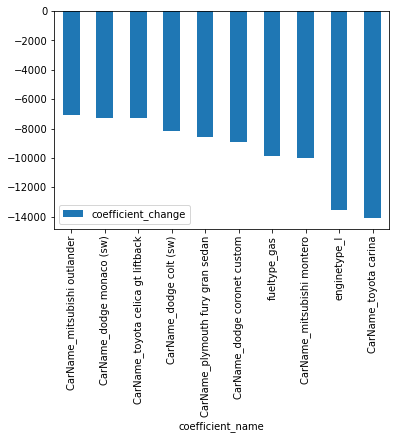

In [40]:
#top ten features that decrease value in a regular car
model2_sum_sorted.tail(10).plot.bar(x='coefficient_name', y='coefficient_change')

<AxesSubplot:xlabel='coefficient_name'>

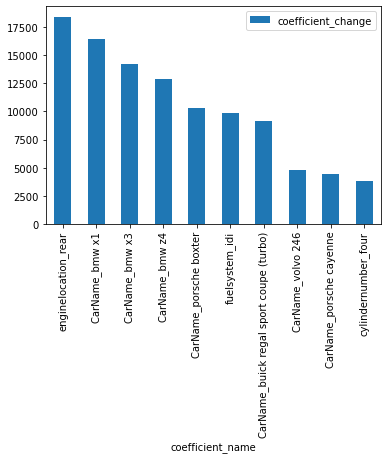

In [41]:
#the top 10 features that add value in a regular car
model2_sum_sorted.head(10).plot.bar(x='coefficient_name', y='coefficient_change')

In [42]:
explainer2 = shap.Explainer(reg2, X2_train, feature_names=X2_test.columns.values)
shap_values2 = explainer2(X2_test)

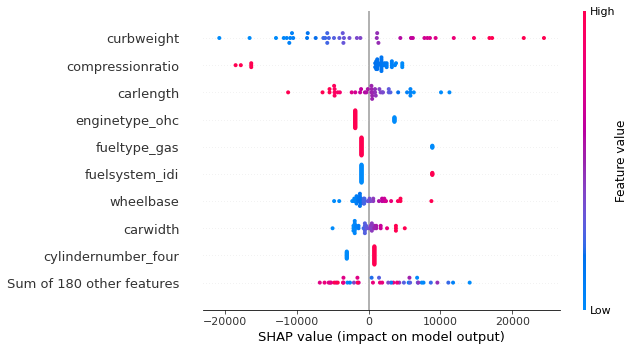

In [43]:
#plotting SHAP values to help explain the contributing variables importances in the regression model
shap.plots.beeswarm(shap_values2)